In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [4]:
titanic_df = pd.read_csv('train.csv')

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Some simple questions to consider at first:
- Who were the passengers on the Titanic?
- What deck were the passengers on and how does that relate to their class?
- Where did the passengers come from?
- Who are alone and who was with their families?
- What factors helped someone survive the sinking? ***

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

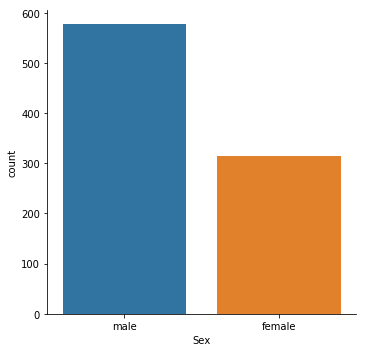

In [27]:
#Who were the passengers on the Titanic?

#Let's first check gender:
sns.factorplot(x='Sex',data=titanic_df,kind='count')

There are way more males than females on Titanic.

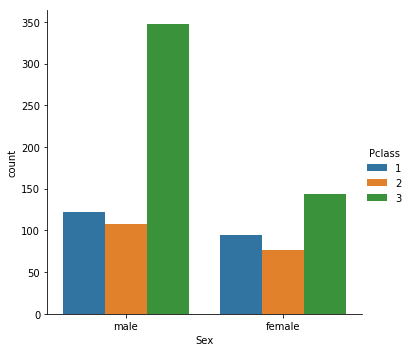

In [29]:
#Separate the Gender by Class:
sns.factorplot(x='Sex',data=titanic_df,hue='Pclass',kind='count')

More males are in the third class than females.

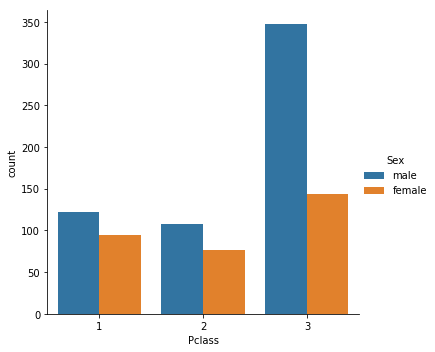

In [30]:
sns.factorplot(x='Pclass',data=titanic_df,hue='Sex',kind='count')

We can really tell the difference that much more of the third class were male than female.

There is a rule called "women and children first", and that would be an important factor to consider the survival rate.

In [31]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age <16:
        return 'child'
    else:
        return sex

In [32]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [33]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In the last row, there is a child who is a 14-year girl.

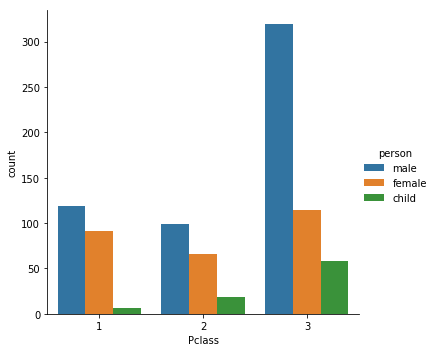

In [34]:
sns.factorplot(x='Pclass',data=titanic_df,hue='person',kind='count')

Now, we've separated all the classes by male,female or child. We can see that more children are in the third class and not somany in the first class.

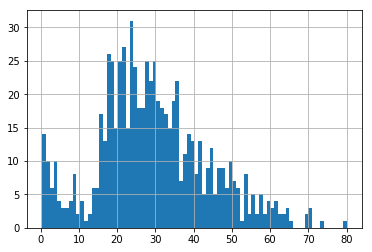

In [39]:
#Create a distribution of the ages to get more information:
titanic_df['Age'].hist(bins=80)

This is the distribution of the ages. You can see a peak at really yound childfren starts to come down towards ten years old, and then you get a more normal distribution in age. Mean looks like it's around 30ish.

In [40]:
#Find mean of the ages:
titanic_df['Age'].mean()

29.69911764705882

In [41]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

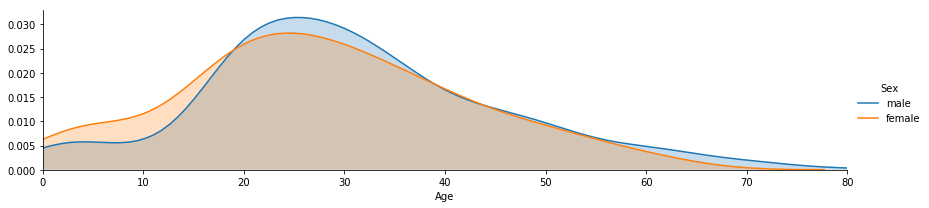

In [60]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4) 

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

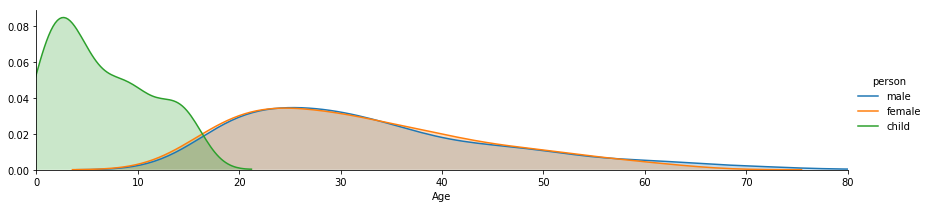

In [61]:
#Include children:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4) 

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

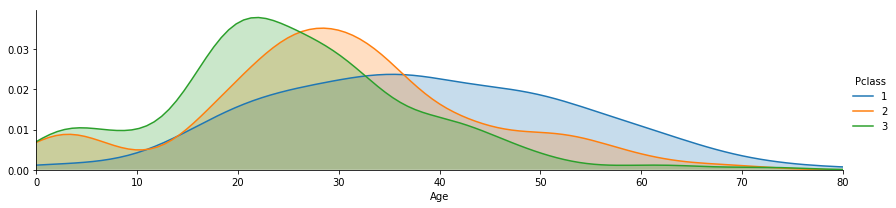

In [62]:
#Classify by Class:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4) 

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

The first class had a really normal distribution, but the second and third class definitely skewed much more towards the 20 through 30 range. And we saw earlier that the average age was around 30.

In [63]:
#Question:What deck were the passengers on and how does that relate to their classes?

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


The cabin columns gives deck information, but there are many null values. We need to drop those null values first.

In [64]:
#Create a column called 'deck' having non-null values of cabin.
deck = titanic_df['Cabin'].dropna()

In [65]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

We only want the first letter of the deck to classify it's level, A,B,C,D,E,F,G.

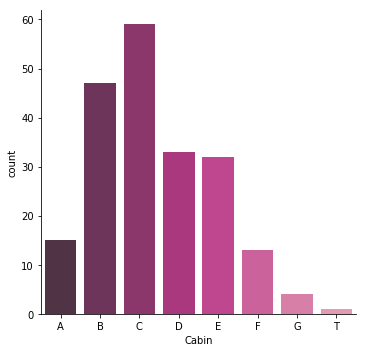

In [82]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='RdPu_d',kind='count',
                order=['A','B','C','D','E','F','G','T'])

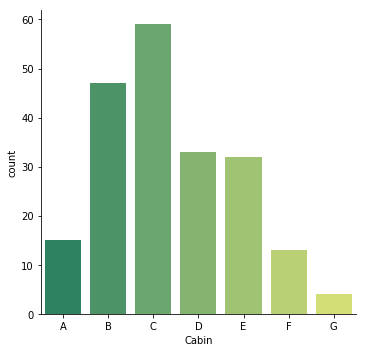

In [83]:
#Get rid of T, since it doesn't mean class.
cabin_df = cabin_df[cabin_df.Cabin !='T']

sns.factorplot(x='Cabin',data=cabin_df,kind='count',palette='summer',
              order=['A','B','C','D','E','F','G'])

In [84]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


The letters in embarkment stand for towns or cities, so C for Cherbourg, Q is for Queenstown, and S is for Southampton. Therefore, we can make a factor plot to check out where people came from. Let's see all these cities embarked and see who from which class came from which cities.

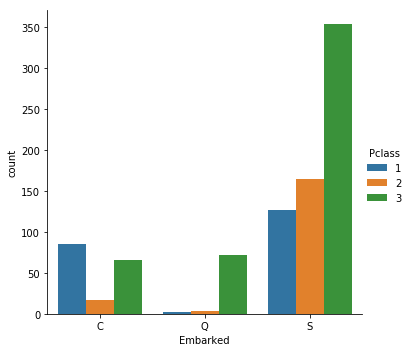

In [87]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'],kind='count')

It looks like in Queenstown, almost all the passengers that boarded there were third-class. While, a lot of people boarded in Cherbourg are first class. It might be due to the different economic environments of these two cities.

In [91]:
#Who was alone and who were with their family?
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In the SibSp column, 1 means they have siblins, 0 means they don't.
In the Parch column, 1 means they have parents or children on board,0 means they have neither parents nor children on board.

In [92]:
#Define a column to define what alone means:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [94]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In the 'Alone' column, anything that is not zero means they had some sort of family on board.

In [96]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/Users/bcchochoao/opt/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [97]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


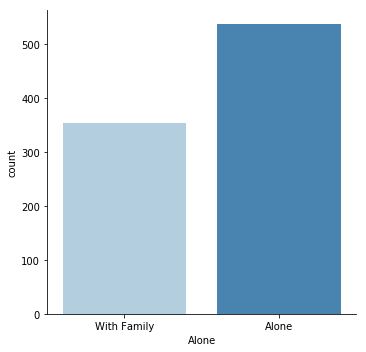

In [99]:
sns.factorplot(x='Alone', data=titanic_df,kind='count',palette='Blues')

It's quite a bit more people were completely alone than those that came on board with some sort of families.